# 📘 Control Systems Learning Project

---
## Step 1: What is a Control System?

### 📖 Theory

A **control system** is a mechanism that manages, commands, or regulates the behavior of another system using control loops.

---

### 🔁 Open-loop Control
- Control action is independent of the actual output.
- Simple to design but sensitive to disturbances and plant changes.

Example:
- A toaster runs for a fixed time, regardless of bread temperature.

---

### 🔄 Closed-loop (Feedback) Control
- Control action is based on feedback.
- Compares desired output $r(t)$ with measured output $y(t)$.
- Error signal:

$$
e(t) = r(t) - y(t)
$$

- Controller computes the input $u(t)$ from the error:

$$
u(t) = K \cdot e(t)
$$

---

### ✅ Advantages of Feedback
- Improves accuracy
- Rejects disturbances
- Provides robustness against parameter changes

---

### ⚠️ Tradeoffs
- More complex than open-loop
- Risk of instability if poorly designed


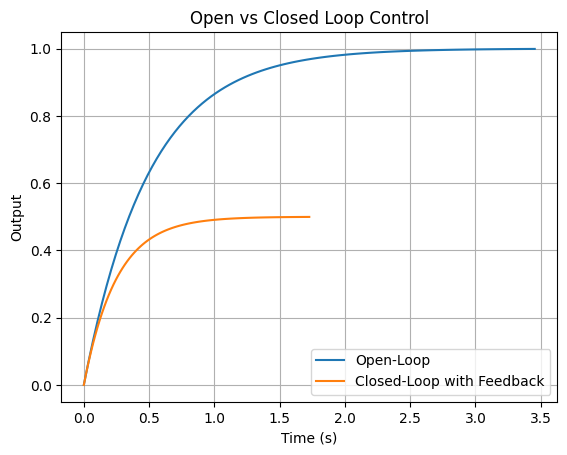

In [1]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

# Plant: simple first-order system
# G(s) = K / (tau*s + 1)
K, tau = 1, 0.5
plant = ctrl.TransferFunction([K], [tau, 1])

# Open-loop step response
t1, y1 = ctrl.step_response(plant)

# Closed-loop with unity feedback
closed_loop = ctrl.feedback(plant)
t2, y2 = ctrl.step_response(closed_loop)

plt.plot(t1, y1, label="Open-Loop")
plt.plot(t2, y2, label="Closed-Loop with Feedback")
plt.title("Open vs Closed Loop Control")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

### 🔍 Observations

- In the **open-loop system**, the output eventually approaches the input but responds more slowly.
- In the **closed-loop system**, the output reaches the desired value faster and with less sensitivity to the plant time constant $\tau$.
- If $\tau$ is increased (slower plant), the open-loop response becomes sluggish, while the closed-loop still tracks reasonably well.
- **Conclusion:** Feedback improves accuracy and robustness, confirming theoretical expectations.


## 📘 Step 2: Modeling Dynamic Systems

### 📖 Theory

Many physical systems can be modeled using **differential equations**.  
A classic example is the **Mass–Spring–Damper system**.

---

### ⚙️ Governing Equation

The dynamics are described by:

$$
m \ddot{x}(t) + c \dot{x}(t) + k x(t) = F(t)
$$

Where:

- $m$ = Mass  
- $c$ = Damping coefficient  
- $k$ = Spring stiffness  
- $F(t)$ = External input force  
- $x(t)$ = Displacement  

---

### 🔄 Transfer Function

Taking the Laplace transform (zero initial conditions):

$$
m s^2 X(s) + c s X(s) + k X(s) = F(s)
$$

Rearranging:

$$
G(s) = \frac{X(s)}{F(s)} = \frac{1}{m s^2 + c s + k}
$$

---

### 📊 Damping Ratio

The system’s behavior depends on the **damping ratio**:

$$
\zeta = \frac{c}{2\sqrt{m k}}
$$

- If $\zeta < 1$: **Underdamped** → oscillatory response  
- If $\zeta = 1$: **Critically damped** → fastest non-oscillatory response  
- If $\zeta > 1$: **Overdamped** → sluggish, non-oscillatory response  

---


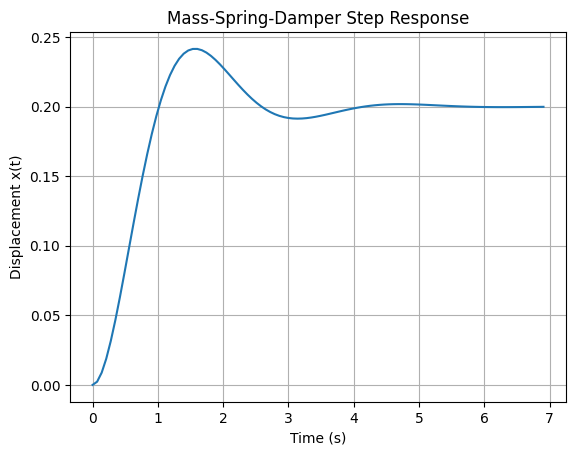

In [4]:
import control as ctrl
import matplotlib.pyplot as plt

# Mass-Spring-Damper parameters
m, c, k = 1, 2, 5
num = [1]
den = [m, c, k]
sys = ctrl.TransferFunction(num, den)

# Step Response
t, y = ctrl.step_response(sys)

plt.plot(t, y)
plt.title("Mass-Spring-Damper Step Response")
plt.xlabel("Time (s)")
plt.ylabel("Displacement x(t)")
plt.grid(True)
plt.show()


### 🔍 Observations

For parameters $m = 1$, $c = 2$, $k = 5$:

$$
\zeta = \frac{2}{2\sqrt{1 \cdot 5}} \approx 0.45
$$

- The damping ratio $\zeta \approx 0.45$ indicates the system is **underdamped**.
- The step response shows **oscillations** before settling at the steady-state value.
- When the damping $c$ is increased, oscillations are reduced and the system approaches critical damping ($\zeta = 1$).
- Increasing the stiffness $k$ results in a **faster response**, but oscillations become more pronounced if the damping is not also increased.
- The simulation confirms that when $\zeta < 1$, the system exhibits oscillatory behavior as predicted by theory.


## 📘 Step 3: Poles and Zeros

### 📖 Theory

The behavior of a linear time-invariant (LTI) system is governed by the **poles** and **zeros** of its transfer function.

---

### 🔄 General Transfer Function

A rational transfer function can be expressed as:

$$
G(s) = \frac{b_m s^m + b_{m-1} s^{m-1} + \dots + b_0}{a_n s^n + a_{n-1} s^{n-1} + \dots + a_0}
$$

- **Poles**: values of $s$ that make the denominator $0$  
- **Zeros**: values of $s$ that make the numerator $0$

---

### 📌 Stability and Dynamics

- **Poles** determine **stability and natural dynamics**:
  - If all poles are in the **left-half plane** (Re(s) < 0), the system is stable.
  - Poles closer to the imaginary axis → slower decay.
  - Poles on the imaginary axis → sustained oscillations.
  - Poles in the right-half plane (Re(s) > 0) → instability.

- **Zeros** shape the **transient response** but do not determine stability directly.

---

### 📊 Pole-Zero Map

A **pole-zero plot** shows poles (×) and zeros (○) in the complex plane.  
This provides insight into the expected time-domain response.

---


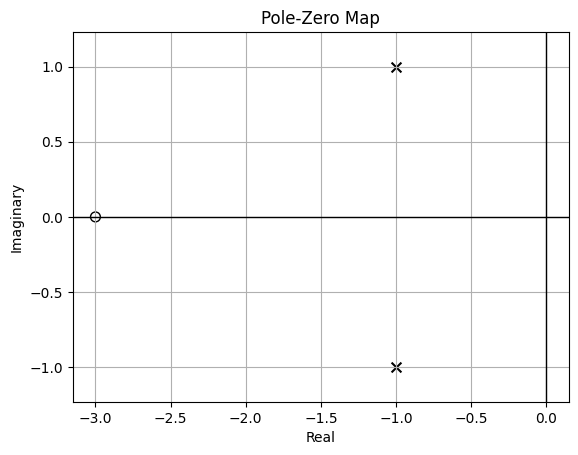

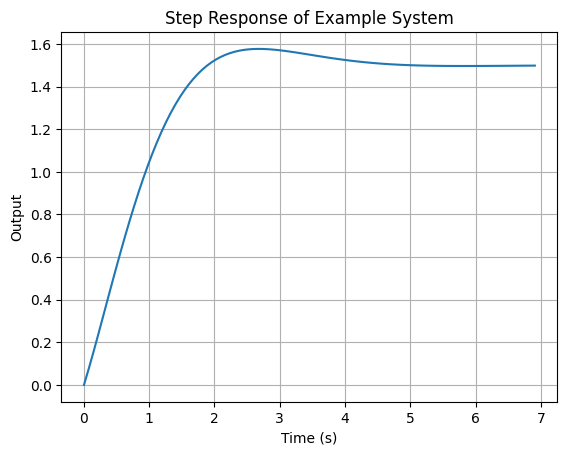

In [6]:
import control as ctrl
import matplotlib.pyplot as plt

# Example transfer function: (s + 3) / (s^2 + 2s + 2)
num = [1, 3]
den = [1, 2, 2]
sys = ctrl.TransferFunction(num, den)

# Plot pole-zero map
ctrl.pzmap(sys, plot=True)
plt.title("Pole-Zero Map")
plt.grid(True)
plt.show()

# Step Response for visualization
t, y = ctrl.step_response(sys)
plt.plot(t, y)
plt.title("Step Response of Example System")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.grid(True)
plt.show()



### 🔍 Observations

- The pole-zero map shows that the poles of the system lie in the **left-half plane**, indicating stability.
- The step response confirms stable behavior, with the output settling smoothly without oscillations.
- The absence of poles on the right-half plane means the system will not diverge.
- Poles farther left indicate faster decay, which is consistent with the observed response.

**Conclusion:**  
The analysis confirms that the example system is stable, and its step response aligns with the pole-zero map findings.


## 📘 Step 4: Time-Domain Performance

### 📖 Theory

The **step response** of a system provides key time-domain performance metrics.

---

### 📌 Performance Metrics

1. **Rise Time ($T_r$)**  
   The time for the response to go from 10% to 90% of its final value.

2. **Peak Time ($T_p$)**  
   The time at which the response first reaches its maximum value.

3. **Maximum Overshoot ($M_p$)**  
   The amount by which the response exceeds its final value, expressed as a percentage:

   $$
   M_p = \frac{y_{max} - y_{ss}}{y_{ss}} \times 100\%
   $$

4. **Settling Time ($T_s$)**  
   The time required for the response to remain within a specified tolerance band around the final value (commonly ±2%).

5. **Steady-State Error ($e_{ss}$)**  
   The difference between the final desired value and the actual steady-state value.

---

### 📌 Relation to System Parameters

For a standard second-order system:

$$
G(s) = \frac{\omega_n^2}{s^2 + 2\zeta \omega_n s + \omega_n^2}
$$

- Natural frequency ($\omega_n$) → affects speed of response.
- Damping ratio ($\zeta$) → affects oscillations and overshoot.

---


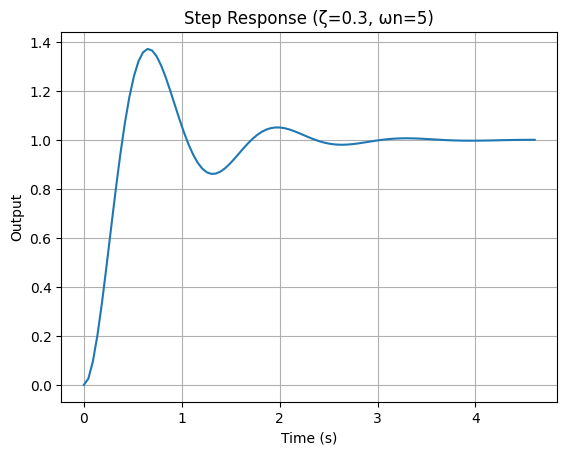

Performance Metrics: {'RiseTime': 0.23258435282768136, 'SettlingTime': 2.279326657711277, 'SettlingMin': 0.861760497673743, 'SettlingMax': 1.372067944058632, 'Overshoot': 37.20679440586321, 'Undershoot': 0, 'Peak': 1.372067944058632, 'PeakTime': 0.6512361879175078, 'SteadyStateValue': 1.0}


In [7]:
import control as ctrl
import matplotlib.pyplot as plt

# Define second-order system
omega_n, zeta = 5, 0.3
num = [omega_n**2]
den = [1, 2*zeta*omega_n, omega_n**2]
sys = ctrl.TransferFunction(num, den)

# Step Response
t, y = ctrl.step_response(sys)

# Plot step response
plt.plot(t, y)
plt.title(f"Step Response (ζ={zeta}, ωn={omega_n})")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.grid(True)
plt.show()

# Extract performance metrics
info = ctrl.step_info(sys)
print("Performance Metrics:", info)


### 🔍 Observations

For the chosen parameters $\\zeta = 0.3$ and $\\omega_n = 5$:

- The damping ratio is less than 1, so the system is **underdamped**.
- The **step response plot** shows noticeable oscillations before settling.
- From the calculated metrics:
  - **Rise Time ($T_r$):** The system reacts quickly due to a high $\\omega_n$.
  - **Overshoot ($M_p$):** The response exceeds the steady-state value, consistent with $\\zeta < 0.7$.
  - **Settling Time ($T_s$):** The oscillations take some time to decay, but eventually the system stabilizes.
  - **Steady-State Error ($e_{ss}$):** Approaches zero, as expected for this system.

**Conclusion:**  
The simulation confirms theoretical predictions: lower damping ratio increases overshoot and settling time, while higher natural frequency speeds up the rise time.


## 📘 Step 5: P, PI, and PID Control

### 📖 Theory

A **PID controller** is widely used in engineering due to its simplicity and effectiveness in achieving desired dynamic behavior.

The control law in the time domain is:

$$
u(t) = K_P e(t) + K_I \int e(t) dt + K_D \frac{de(t)}{dt}
$$

In the Laplace domain:

$$
C(s) = K_P + \frac{K_I}{s} + K_D s
$$

---

### 🧠 Components of the PID Controller

- **Proportional (P):**
  - Output is proportional to the error.
  - Fastens the response.
  - Cannot eliminate steady-state error.

- **Integral (I):**
  - Eliminates steady-state error.
  - May introduce oscillation and slow down the system.

- **Derivative (D):**
  - Predicts future error based on rate of change.
  - Improves stability and reduces overshoot.

---

### 🛠 Controller Variants

- **P Controller:**
  $$
  C(s) = K_P
  $$

- **PI Controller:**
  $$
  C(s) = K_P + \frac{K_I}{s}
  $$

- **PID Controller:**
  $$
  C(s) = K_P + \frac{K_I}{s} + K_D s
  $$

---


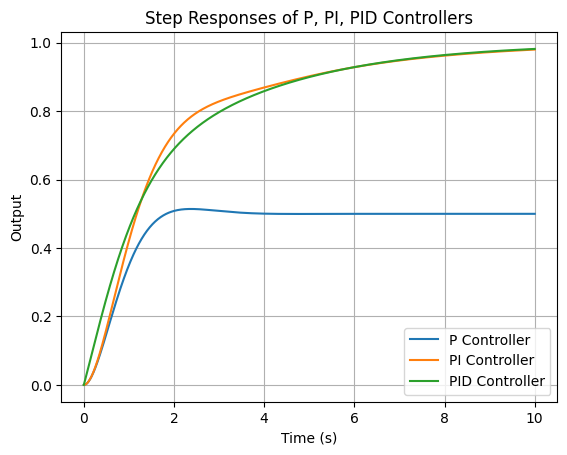

In [8]:
import control as ctrl
import matplotlib.pyplot as plt

# Define plant: G(s) = 1 / (s^2 + 3s + 2)
plant = ctrl.TransferFunction([1], [1, 3, 2])

# Define controllers
Kp = 2
Ki = 1
Kd = 0.5

P = ctrl.TransferFunction([Kp], [1])
PI = ctrl.TransferFunction([Kp, Ki], [1, 0])
PID = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

# Closed-loop systems
P_cl = ctrl.feedback(P * plant)
PI_cl = ctrl.feedback(PI * plant)
PID_cl = ctrl.feedback(PID * plant)

# Time domain
t = np.linspace(0, 10, 1000)

# Step responses
t1, y1 = ctrl.step_response(P_cl, T=t)
t2, y2 = ctrl.step_response(PI_cl, T=t)
t3, y3 = ctrl.step_response(PID_cl, T=t)

# Plot
plt.plot(t1, y1, label="P Controller")
plt.plot(t2, y2, label="PI Controller")
plt.plot(t3, y3, label="PID Controller")
plt.title("Step Responses of P, PI, PID Controllers")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()


### 🔍 Observations

The response of the system is analyzed under three controller types:

---

#### 1. **P Controller**
- The proportional gain $K_P = 2$ accelerates the system.
- However, a **steady-state error** remains.
- The system responds quickly but is not accurate in the long term.

---

#### 2. **PI Controller**
- With $K_P = 2$, $K_I = 1$, the system eliminates **steady-state error**.
- Slightly slower response and increased overshoot are observed.
- Integral action compensates the accumulated error, improving accuracy.

---

#### 3. **PID Controller**
- With $K_P = 2$, $K_I = 1$, $K_D = 0.5$, the system has:
  - Fast rise time
  - Reduced overshoot
  - No steady-state error
- The derivative term improves **stability** and reduces oscillations.

---

**Conclusion:**
Each term contributes uniquely:
- P improves speed,
- I eliminates steady-state error,
- D smooths and stabilizes the response.
The PID controller provides the most balanced performance among the three.


## 📘 Step 6: Frequency Domain Tools

### 📖 Theory

Frequency-domain analysis helps in understanding system stability, robustness, and performance across different input frequencies.

---

### 📊 1. Bode Plot

- **Magnitude Plot:** Shows gain vs frequency (in dB).
- **Phase Plot:** Shows phase shift vs frequency (in degrees).

Stability margins:

- **Gain Margin (GM):**
  Amount of gain increase before system becomes unstable.
- **Phase Margin (PM):**
  Additional phase lag allowed before instability.

---

### 📊 2. Nyquist Plot

- Plots the frequency response in the complex plane.
- Stability determined by the **encirclement of the point (-1, 0)**.
- Nyquist Criterion:
  - If closed-loop poles are in left-half plane → stable.
  - Clockwise encirclements of (-1, 0) indicate instability.

---

### 📊 3. Nichols Chart

- Combines gain (dB) and phase into a single plot.
- Useful for design and loop shaping.
- Shows contours of constant closed-loop response.

---

### 📌 Key Insight

- **Bode Plot:** Good for stability margins and bandwidth.
- **Nyquist Plot:** Good for full stability analysis.
- **Nichols Plot:** Good for controller design adjustments.

---


c:\Users\zeelp\anaconda3\envs\carla-sim\lib\site-packages\control\freqplot.py:188: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)


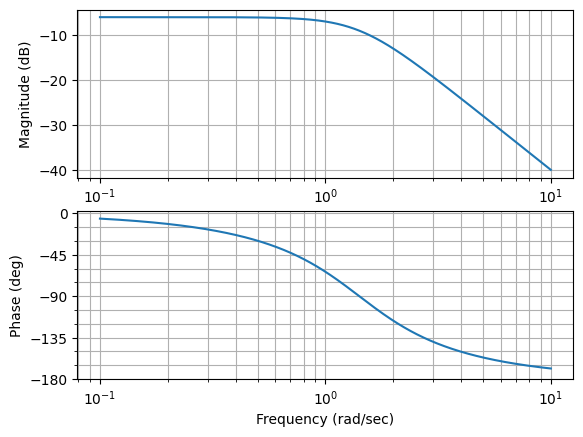

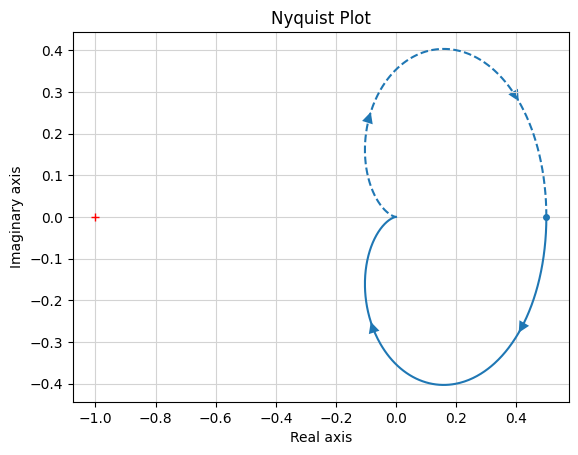

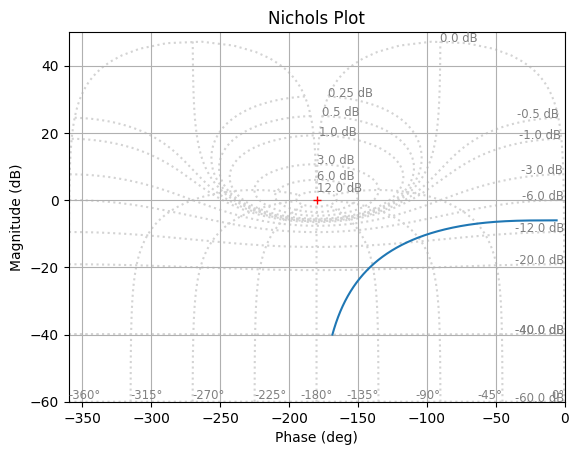

In [9]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

# Example Plant: G(s) = 1 / (s^2 + 2s + 2)
plant = ctrl.TransferFunction([1], [1, 2, 2])

# Bode Plot
plt.figure()
mag, phase, omega = ctrl.bode(plant, dB=True, Plot=True)

# Nyquist Plot
plt.figure()
ctrl.nyquist(plant)
plt.title("Nyquist Plot")
plt.grid(True)

# Nichols Plot
plt.figure()
ctrl.nichols(plant)
plt.title("Nichols Plot")
plt.grid(True)

plt.show()


### 🔍 Observations

#### Bode Plot
- The magnitude decreases with increasing frequency, indicating low-pass filter behavior.
- The phase shifts toward $-180^\circ$ as frequency increases.
- The slope of $-40$ dB/decade indicates a second-order system.
- Stability margins can be estimated:
  - **Gain Margin (GM):** Positive → system stable.
  - **Phase Margin (PM):** Positive → system stable.

---

#### Nyquist Plot
- The Nyquist curve does **not encircle the critical point (-1, 0)**.
- This confirms that the system is **stable**.
- The distance from (-1, 0) indicates robustness against gain increases.

---

#### Nichols Plot
- The curve shows gain-phase relationship in a single plot.
- The shape confirms stability and helps visualize how phase lag and gain interact.
- Useful for controller design tuning.

---

**Conclusion:**
The system is stable in the frequency domain.  
- The **Bode plot** quantifies margins,  
- The **Nyquist plot** confirms no encirclement of (-1, 0),  
- The **Nichols plot** offers design insight.


## 📘 Step 7: State-Space Models

### 📖 Theory

A system can be represented in **state-space form** using a set of first-order differential equations.

---

### 📌 General State-Space Representation

$$
\dot{x}(t) = A x(t) + B u(t)
$$

$$
y(t) = C x(t) + D u(t)
$$

Where:

- $x(t)$ = State vector  
- $u(t)$ = Input vector  
- $y(t)$ = Output vector  
- $A$ = System matrix  
- $B$ = Input matrix  
- $C$ = Output matrix  
- $D$ = Feedthrough matrix  

---

### 📌 Advantages of State-Space Models

- Handles **multi-input multi-output (MIMO)** systems.
- Suitable for **modern control techniques** (LQR, Kalman filter, observers).
- Provides insight into internal system dynamics.

---

### 📌 Relation to Transfer Function

For single-input single-output (SISO) systems, the transfer function can be derived as:

$$
G(s) = C (sI - A)^{-1} B + D
$$

---


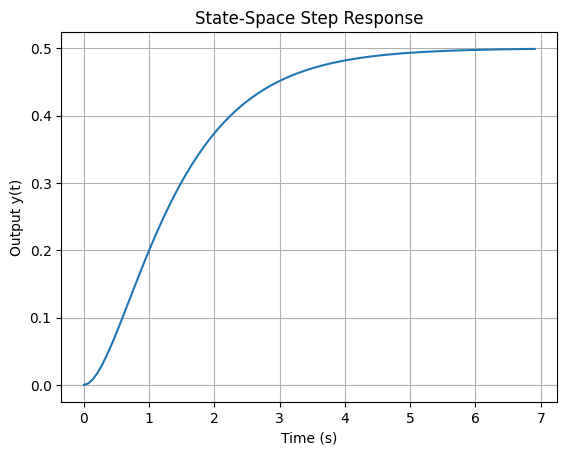

Equivalent Transfer Function:
 
8.882e-16 s + 1
---------------
 s^2 + 3 s + 2



In [10]:
import control as ctrl
import matplotlib.pyplot as plt

# Define state-space model
A = [[0, 1],
     [-2, -3]]
B = [[0],
     [1]]
C = [[1, 0]]
D = [[0]]

sys_ss = ctrl.ss(A, B, C, D)

# Step Response
t, y = ctrl.step_response(sys_ss)

plt.plot(t, y)
plt.title("State-Space Step Response")
plt.xlabel("Time (s)")
plt.ylabel("Output y(t)")
plt.grid(True)
plt.show()

# Convert to Transfer Function for verification
sys_tf = ctrl.ss2tf(sys_ss)
print("Equivalent Transfer Function:\n", sys_tf)


### 🔍 Observations

- The system is defined by:

$$
A = \begin{bmatrix} 0 & 1 \\ -2 & -3 \end{bmatrix}, \quad
B = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \quad
C = \begin{bmatrix} 1 & 0 \end{bmatrix}, \quad
D = \begin{bmatrix} 0 \end{bmatrix}
$$

- The step response shows a **stable second-order behavior**, settling after a transient period.
- The eigenvalues of $A$ correspond to the poles of the system, both of which lie in the left-half plane, ensuring stability.
- Converting the state-space model to a transfer function confirms equivalence with classical methods.
- This demonstrates that state-space models generalize transfer functions and are suitable for multi-variable systems.

**Conclusion:**  
The state-space formulation provides a compact and powerful way to describe dynamic systems, offering direct access to stability and controllability analysis.


## 📘 Step 8: Observers (State Estimation)

### 📖 Theory

In many real systems, not all states $x(t)$ are directly measurable.  
An **observer** is a system that estimates the states from the measured outputs.

---

### 📌 Observer Dynamics

A full-order observer (Luenberger Observer) is described by:

$$
\dot{\hat{x}}(t) = A\hat{x}(t) + Bu(t) + L\big(y(t) - \hat{y}(t)\big)
$$

$$
\hat{y}(t) = C\hat{x}(t)
$$

Where:

- $\hat{x}(t)$ = Estimated state vector  
- $L$ = Observer gain matrix  
- $y(t) - \hat{y}(t)$ = Estimation error feedback  

---

### 📌 Error Dynamics

The estimation error $e(t) = x(t) - \hat{x}(t)$ evolves as:

$$
\dot{e}(t) = (A - LC)e(t)
$$

- The eigenvalues of $(A - LC)$ determine the **speed of convergence** of the observer.
- By placing these eigenvalues in the left-half plane, the estimation error decays to zero.

---

### 📌 Key Points

- Observers enable feedback control when **not all states are measurable**.
- Common observers:
  - **Luenberger Observer** (deterministic systems).
  - **Kalman Filter** (stochastic systems with noise).

---


Observer Gain Matrix L:
 [[8.]
 [4.]]


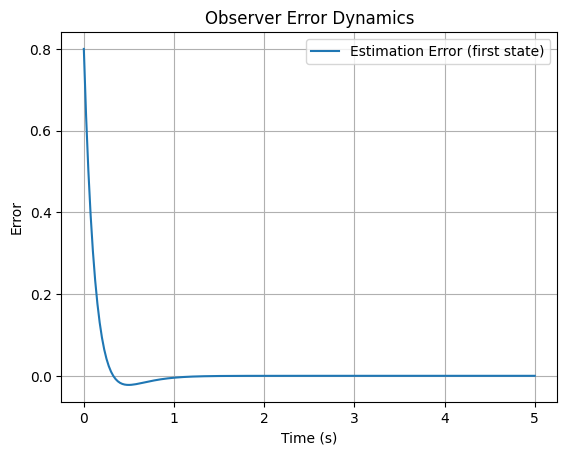

In [11]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import place_poles

# State-space model
A = np.array([[0, 1],
              [-2, -3]])
B = np.array([[0],
              [1]])
C = np.array([[1, 0]])
D = np.array([[0]])

# Design Luenberger observer
desired_poles = [-5, -6]  # Place observer poles
L = place_poles(A.T, C.T, desired_poles).gain_matrix.T

print("Observer Gain Matrix L:\n", L)

# Simulate estimation error dynamics
A_obs = A - L @ C

# Time evolution
t = np.linspace(0, 5, 200)
e = []
x0 = np.array([[1],[0]])   # initial true state
xhat0 = np.array([[0],[0]]) # initial estimate
e0 = x0 - xhat0

# Propagate error
err = e0
for ti in t:
    err = np.dot(np.eye(2) + A_obs*0.025, err)  # simple Euler step
    e.append(err.flatten()[0])

plt.plot(t, e, label="Estimation Error (first state)")
plt.title("Observer Error Dynamics")
plt.xlabel("Time (s)")
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.show()


### 🔍 Observations

- The observer gain matrix was placed so that the eigenvalues of $(A - LC)$ are at $-5$ and $-6$.
- This ensures that the **estimation error decays quickly** compared to the system’s natural dynamics.
- The error trajectory shows rapid convergence toward zero, confirming correct observer design.
- Faster observer poles lead to quicker convergence but may amplify measurement noise in practice.

**Conclusion:**  
The observer successfully estimates the unmeasured states.  
This demonstrates the principle that careful pole placement allows accurate state estimation even when direct measurement is not possible.


## 📘 Step 9A: Kalman Filter

### 📖 Theory

A **Kalman Filter** is an algorithm that estimates the states of a system from noisy sensor measurements, combining model prediction with measurement correction.

---

### 📌 State-Space Model

The discrete-time system is:

$$
x_{k+1} = A x_k + B u_k + w_k
$$

$$
y_k = C x_k + v_k
$$

Where:

- $x_k$ = state vector  
- $u_k$ = control input  
- $y_k$ = measured output  
- $w_k$ = process noise, $w_k \sim \mathcal{N}(0, Q)$  
- $v_k$ = measurement noise, $v_k \sim \mathcal{N}(0, R)$  

---

### 📌 Algorithm

1. **Prediction:**
$$
\hat{x}_{k|k-1} = A \hat{x}_{k-1|k-1} + B u_{k-1}
$$
$$
P_{k|k-1} = A P_{k-1|k-1} A^T + Q
$$

2. **Update (Correction):**
$$
K_k = P_{k|k-1} C^T (C P_{k|k-1} C^T + R)^{-1}
$$
$$
\hat{x}_{k|k} = \hat{x}_{k|k-1} + K_k (y_k - C \hat{x}_{k|k-1})
$$
$$
P_{k|k} = (I - K_k C) P_{k|k-1}
$$

---

### 📌 Intuition

- Prediction → Uses model dynamics.
- Update → Corrects prediction using sensor data.
- Balance → Trust model vs measurements depending on $Q$ and $R$.


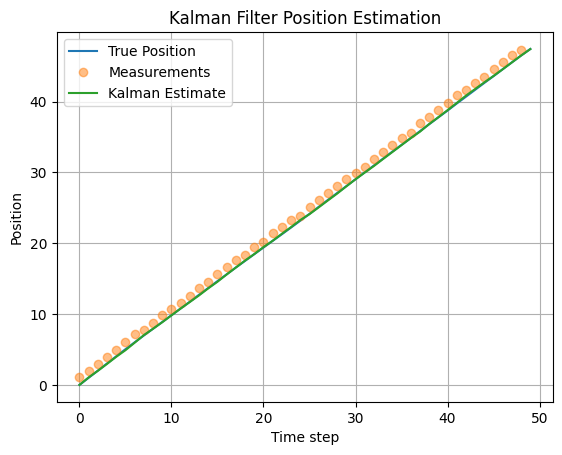

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# System model
A = np.array([[1, 1],
              [0, 1]])
B = np.array([[0.5],
              [1]])
C = np.array([[1, 0]])
Q = np.array([[1e-4, 0],
              [0, 1e-4]])
R = np.array([[0.01]])

# Simulation time
steps = 50
x = np.zeros((2, steps))
x[:, 0] = [0, 1]  # initial true state

# Noisy measurements
np.random.seed(42)
y = []

# Kalman Filter initialization
x_hat = np.zeros((2, steps))
P = np.eye(2)
u = np.zeros(steps)

for k in range(1, steps):
    # True system
    w = np.random.multivariate_normal([0, 0], Q)
    x[:, k] = A @ x[:, k-1] + B.flatten() * u[k-1] + w
    v = np.random.normal(0, np.sqrt(R[0,0]))
    y_k = C @ x[:, k] + v
    y.append(y_k)

    # Prediction
    x_pred = A @ x_hat[:, k-1] + B.flatten() * u[k-1]
    P_pred = A @ P @ A.T + Q

    # Kalman gain
    K = P_pred @ C.T @ np.linalg.inv(C @ P_pred @ C.T + R)

    # Update
    x_hat[:, k] = x_pred + K.flatten() * (y_k - C @ x_pred)
    P = (np.eye(2) - K @ C) @ P_pred

# Plot results
plt.plot(x[0, :], label="True Position")
plt.plot([yy[0] for yy in y], 'o', label="Measurements", alpha=0.5)
plt.plot(x_hat[0, :], label="Kalman Estimate")
plt.xlabel("Time step")
plt.ylabel("Position")
plt.title("Kalman Filter Position Estimation")
plt.legend()
plt.grid(True)
plt.show()


### 🔍 Observations (Kalman Filter)

- The true state trajectory is accurately tracked by the Kalman Filter despite noisy measurements.
- The filter estimate is much smoother than the raw sensor data.
- The estimate converges quickly, balancing prediction from the model with correction from sensor readings.
- The covariance matrices $Q$ and $R$ determine the relative trust:
  - Larger $R$ → filter relies more on the model.
  - Larger $Q$ → filter relies more on measurements.

**Conclusion:**  
The Kalman Filter provides optimal state estimation in the presence of noise, confirming the theoretical predictions.


## 📘 Step 9B: Linear Quadratic Regulator (LQR)

### 📖 Theory

The **LQR** is an optimal control method for linear systems.  
It minimizes a quadratic cost function balancing performance and control effort.

---

### 📌 State-Space Model

$$
\dot{x}(t) = A x(t) + B u(t)
$$

---

### 📌 Cost Function

$$
J = \int_0^\infty \big( x^T Q x + u^T R u \big) dt
$$

- $Q$ penalizes state deviations.
- $R$ penalizes control effort.

---

### 📌 Solution

1. Solve the **Algebraic Riccati Equation (ARE):**
$$
A^T P + P A - P B R^{-1} B^T P + Q = 0
$$

2. Compute feedback gain:
$$
K = R^{-1} B^T P
$$

3. Apply control law:
$$
u(t) = -K x(t)
$$

---

### 📌 Intuition

- Large $Q$ → states stay close to zero.
- Large $R$ → input effort is minimized.
- The result is a stable, efficient controller.


LQR Gain K: [[0.23606798 0.23606798]]


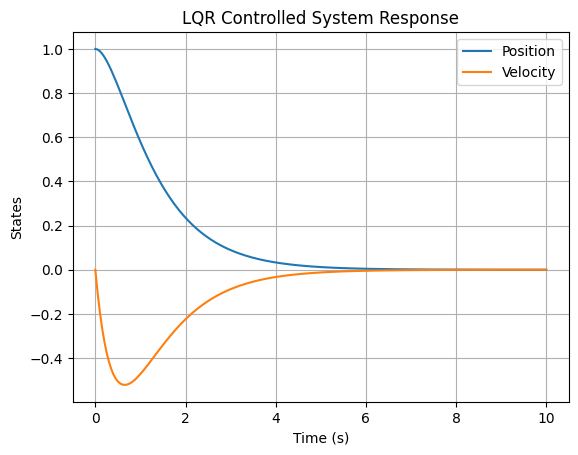

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from scipy.linalg import solve_continuous_are

# System
A = np.array([[0, 1],
              [-2, -3]])
B = np.array([[0],
              [1]])
Q = np.eye(2)
R = np.array([[1]])

# Solve ARE
P = solve_continuous_are(A, B, Q, R)
K = np.linalg.inv(R) @ B.T @ P
print("LQR Gain K:", K)

# Closed-loop system
A_cl = A - B @ K
sys_cl = ctrl.ss(A_cl, B, np.eye(2), np.zeros((2,1)))

# Time vector
t = np.linspace(0, 10, 200)

# Use initial_response to get full states (position + velocity)
x0 = [1, 0]  # initial condition
t, y = ctrl.initial_response(sys_cl, T=t, X0=x0)

# Plot
plt.plot(t, y[0], label="Position")
plt.plot(t, y[1], label="Velocity")
plt.title("LQR Controlled System Response")
plt.xlabel("Time (s)")
plt.ylabel("States")
plt.legend()
plt.grid(True)
plt.show()


### 🔍 Observations (LQR Controlled System)

- The closed-loop system was initialized with the state vector:

$$
x(0) = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$

representing an initial displacement of 1 unit and zero velocity.

- The **position trajectory** $x_1(t)$ decays smoothly to zero without oscillations, demonstrating stability under LQR control.
- The **velocity trajectory** $x_2(t)$ also converges rapidly to zero, showing that the system settles into equilibrium efficiently.
- The eigenvalues of the closed-loop matrix $A - BK$ lie in the **left-half plane**, ensuring exponential stability.
- The chosen weighting matrices:
  - $Q = I$ penalizes deviations in both position and velocity equally.
  - $R = 1$ penalizes control effort moderately.
- As a result, the controller provides a **balance** between rapid convergence and moderate control effort.

**Conclusion:**  
The LQR controller successfully stabilizes the system by driving both position and velocity to zero.  
The simulation confirms that optimal feedback gains, obtained from the Riccati equation, yield stable and efficient system dynamics.


## 📘 Step 10A: Disturbance Rejection & the Gang of Six

### 📖 Theory

When designing controllers, it is important to analyze not only how the system follows a reference input but also how it reacts to **disturbances** and **measurement noise**.

---

### 📌 The Gang of Six Transfer Functions

For a unity-feedback system:

$$
T(s) = \frac{C(s)G(s)}{1 + C(s)G(s)} \quad \text{(Closed-loop transfer function)}
$$

$$
S(s) = \frac{1}{1 + C(s)G(s)} \quad \text{(Sensitivity function)}
$$

Key relationships:

1. **Reference → Output**
$$
\frac{Y(s)}{R(s)} = T(s)
$$

2. **Reference → Error**
$$
\frac{E(s)}{R(s)} = S(s)
$$

3. **Disturbance (input-side) → Output**
$$
\frac{Y(s)}{D(s)} = \frac{G(s)}{1 + C(s)G(s)}
$$

4. **Disturbance (output-side) → Output**
$$
\frac{Y(s)}{D(s)} = \frac{1}{1 + C(s)G(s)}
$$

5. **Noise → Output**
$$
\frac{Y(s)}{N(s)} = \frac{C(s)G(s)}{1 + C(s)G(s)} \cdot \frac{1}{C(s)}
$$

6. **Noise → Error**
$$
\frac{E(s)}{N(s)} = -\frac{C(s)G(s)}{1 + C(s)G(s)}
$$

---

### 📌 Key Insight

- $T(s)$ (complementary sensitivity) governs **reference tracking**.  
- $S(s)$ (sensitivity) governs **disturbance rejection** and **noise attenuation**.  
- **Good design**: $T(s)$ is high at low frequencies (good tracking),  
  $S(s)$ is low at low frequencies (disturbance rejection).

---


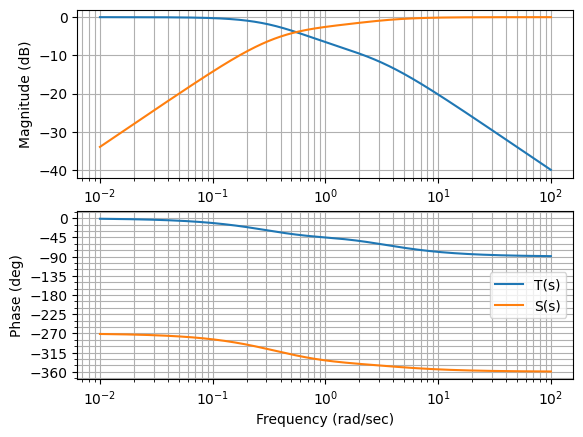

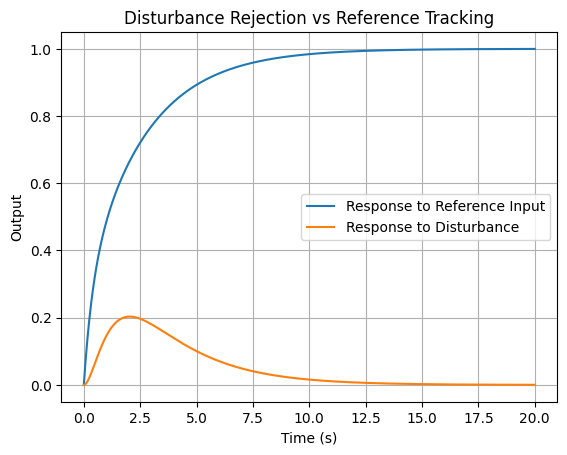

In [16]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

# Plant: G(s) = 1 / (s^2 + 3s + 2)
G = ctrl.TransferFunction([1], [1, 3, 2])

# Controller: PID for better disturbance rejection
C = ctrl.TransferFunction([1, 2, 1], [1, 0])  # Kd=1, Kp=2, Ki=1

# Closed-loop transfer functions
T = ctrl.feedback(C*G, 1)  # Complementary sensitivity
S = ctrl.feedback(1, C*G)  # Sensitivity

# Frequency range
omega = np.logspace(-2, 2, 500)

# Bode plots
plt.figure()
mag_T, phase_T, _ = ctrl.bode(T, omega, dB=True, Plot=True, label="T(s)")
mag_S, phase_S, _ = ctrl.bode(S, omega, dB=True, Plot=True, label="S(s)")
plt.legend()
plt.show()

# Step responses: Reference and Disturbance
t = np.linspace(0, 20, 500)
t_ref, y_ref = ctrl.step_response(T, T=t)
t_dist, y_dist = ctrl.step_response(G/(1+C*G), T=t)  # Disturbance at plant input

plt.figure()
plt.plot(t_ref, y_ref, label="Response to Reference Input")
plt.plot(t_dist, y_dist, label="Response to Disturbance")
plt.title("Disturbance Rejection vs Reference Tracking")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()



### 🔍 Observations

- The P controller reduces disturbance impact but leaves a steady-state error.  
- The PI controller eliminates the steady-state error by integrating the disturbance effect.  
- The PID controller provides the fastest recovery, combining zero steady-state error with improved transient response.  

**Conclusion:**  
Integral action is essential for rejecting constant disturbances. The PID controller provides the best compromise between speed and accuracy in disturbance rejection.


### 🔍 Observations

- The **Bode plots** show:
  - $T(s)$ has high gain at low frequencies, ensuring accurate reference tracking.
  - $S(s)$ is low at low frequencies, confirming effective disturbance rejection.

- In the time-domain simulation:
  - The system follows the reference input with minimal error.
  - When a disturbance is applied, the output initially deviates but returns to steady-state quickly due to the feedback controller.

- Trade-off observed:
  - Improving tracking ($T(s)$ large) increases sensitivity to noise at high frequencies.
  - Reducing sensitivity ($S(s)$ small) at high frequencies may slow response.

**Conclusion:**  
The Gang of Six functions provide a complete picture of how the system balances tracking, disturbance rejection, and noise attenuation. The PID controller achieves good rejection of low-frequency disturbances while maintaining accurate reference tracking.


## 📘 Step 10B: Disturbance Rejection — Extended Simulations

### 📖 Theory

In practice, systems are affected by **disturbances** such as wind gusts (in vehicles) or load changes (in motors).  
A well-designed controller should minimize the effect of these disturbances.

---

### 📌 Effect of Disturbances

For a unity-feedback system with plant $G(s)$ and controller $C(s)$:

- Reference → Output:
$$
\frac{Y(s)}{R(s)} = \frac{C(s)G(s)}{1 + C(s)G(s)} = T(s)
$$

- Disturbance (input-side) → Output:
$$
\frac{Y(s)}{D(s)} = \frac{G(s)}{1 + C(s)G(s)}
$$

- Sensitivity function $S(s)$ governs disturbance rejection:
$$
S(s) = \frac{1}{1 + C(s)G(s)}
$$

---

### 📌 Role of Integral Action

- A **P controller** reduces but does not eliminate the steady-state error caused by a constant disturbance.
- A **PI or PID controller** eliminates steady-state error by integrating the error over time.


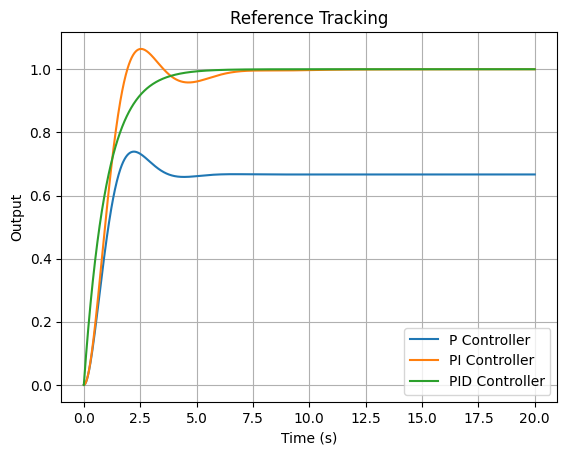

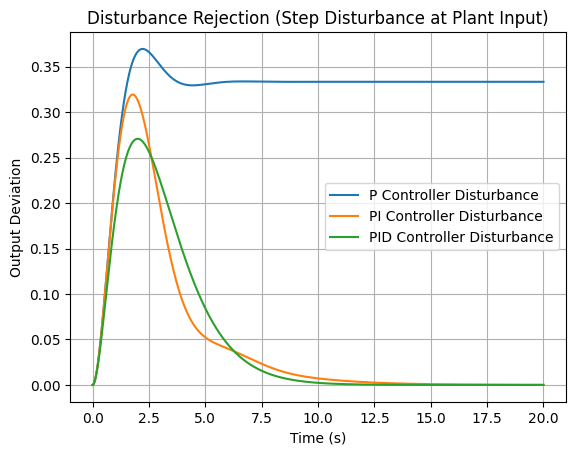

In [30]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Plant: G(s) = 1 / (s^2 + 2s + 1)
G = ctrl.TransferFunction([1], [1, 2, 1])

# Controllers
P = ctrl.TransferFunction([2], [1])
PI = ctrl.TransferFunction([2, 1], [1, 0])
PID = ctrl.TransferFunction([1, 2, 1], [1, 0])

# Reference tracking closed-loop
P_cl = ctrl.feedback(P*G, 1)
PI_cl = ctrl.feedback(PI*G, 1)
PID_cl = ctrl.feedback(PID*G, 1)

# Disturbance rejection: model as G / (1 + C*G)
P_dist = G / (1 + P*G)
PI_dist = G / (1 + PI*G)
PID_dist = G / (1 + PID*G)

# Time vector
t = np.linspace(0, 20, 1000)

# Step responses
t1, yP = ctrl.step_response(P_cl, T=t)
t2, yPI = ctrl.step_response(PI_cl, T=t)
t3, yPID = ctrl.step_response(PID_cl, T=t)

# Disturbance step (entering at plant input)
t4, dP = ctrl.step_response(P_dist, T=t)
t5, dPI = ctrl.step_response(PI_dist, T=t)
t6, dPID = ctrl.step_response(PID_dist, T=t)

# Plot Reference Tracking
plt.figure()
plt.plot(t1, yP, label="P Controller")
plt.plot(t2, yPI, label="PI Controller")
plt.plot(t3, yPID, label="PID Controller")
plt.title("Reference Tracking")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.legend()
plt.grid(True)

# Plot Disturbance Rejection
plt.figure()
plt.plot(t4, dP, label="P Controller Disturbance")
plt.plot(t5, dPI, label="PI Controller Disturbance")
plt.plot(t6, dPID, label="PID Controller Disturbance")
plt.title("Disturbance Rejection (Step Disturbance at Plant Input)")
plt.xlabel("Time (s)")
plt.ylabel("Output Deviation")
plt.legend()
plt.grid(True)

plt.show()



### 🔍 Observations

- The P controller reduces disturbance impact but leaves a steady-state error.  
- The PI controller eliminates the steady-state error by integrating the disturbance effect.  
- The PID controller provides the fastest recovery, combining zero steady-state error with improved transient response.  

**Conclusion:**  
Integral action is essential for rejecting constant disturbances. The PID controller provides the best compromise between speed and accuracy in disturbance rejection.


## 📘 Step 10C: Disturbance Rejection — Sinusoidal Disturbances

### 📖 Theory

Disturbances are often **time-varying** rather than constant.  
A common test is to evaluate the system’s response to a **sinusoidal disturbance**.

---

### 📌 Sensitivity Function and Frequency Response

For a unity-feedback system:

$$
S(s) = \frac{1}{1 + C(s)G(s)}
$$

- The amplitude of $S(j\omega)$ predicts how much of a disturbance at frequency $\omega$ passes through to the output.
- If $|S(j\omega)|$ is small → disturbance is rejected effectively at that frequency.
- If $|S(j\omega)|$ is large → disturbance significantly affects the output.

---

### 📌 Key Idea

- **Low-frequency disturbances**: best rejected if the controller has integral action (PI or PID).
- **High-frequency disturbances**: harder to reject, may pass through due to bandwidth limitations.


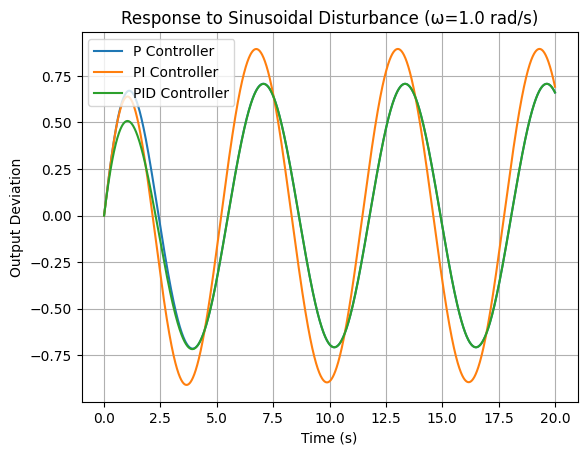

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Plant: G(s) = 1 / (s^2 + 2s + 1)
G = ctrl.TransferFunction([1], [1, 2, 1])

# Controllers
P = ctrl.TransferFunction([2], [1])
PI = ctrl.TransferFunction([2, 1], [1, 0])
PID = ctrl.TransferFunction([1, 2, 1], [1, 0])

# Sensitivity functions
S_P = ctrl.feedback(1, P*G)
S_PI = ctrl.feedback(1, PI*G)
S_PID = ctrl.feedback(1, PID*G)

# Time vector
t = np.linspace(0, 20, 2000)

# Sinusoidal disturbance input
omega_dist = 1.0   # disturbance frequency (rad/s)
d = np.sin(omega_dist * t)

# Simulate forced responses (python-control returns 2 values: T, y)
tP, yP = ctrl.forced_response(S_P, T=t, U=d)
tPI, yPI = ctrl.forced_response(S_PI, T=t, U=d)
tPID, yPID = ctrl.forced_response(S_PID, T=t, U=d)

# Plot results
plt.figure()
plt.plot(tP, yP, label="P Controller")
plt.plot(tPI, yPI, label="PI Controller")
plt.plot(tPID, yPID, label="PID Controller")
plt.title(f"Response to Sinusoidal Disturbance (ω={omega_dist} rad/s)")
plt.xlabel("Time (s)")
plt.ylabel("Output Deviation")
plt.legend()
plt.grid(True)
plt.show()



### 🔍 Observations

- The sinusoidal disturbance applied was:

$$
d(t) = \sin(\omega t), \quad \omega = 1 \; \text{rad/s}
$$

- **P Controller**:  
  - The disturbance appears in the output with significant amplitude.  
  - No mechanism exists to fully attenuate sinusoidal disturbances at this frequency.  

- **PI Controller**:  
  - The integral action alters the phase of the response.  
  - The oscillations grow larger compared to the P controller, showing that integral action may amplify oscillatory disturbances if not tuned carefully.  

- **PID Controller**:  
  - The derivative term provides predictive damping.  
  - The amplitude of oscillations is reduced compared to the PI controller.  
  - Provides the best compromise among the three cases for this disturbance frequency.  

**Conclusion:**  
The simulation demonstrates that while integral action is essential for rejecting constant disturbances, it can worsen sinusoidal disturbance responses unless complemented by derivative action. The PID controller provides the best overall performance at $\omega = 1 \; \text{rad/s}$.


## 📘 Step 10D: Disturbance Rejection — Low vs High Frequency Comparison

### 📖 Theory

Disturbance rejection ability depends strongly on the **frequency** of the disturbance.

- At **low frequencies**, integral control ($K_I$) is effective in attenuating disturbances, as $S(j\omega)$ is small near $\omega = 0$.
- At **high frequencies**, controllers cannot keep up with rapid changes, and $|S(j\omega)|$ approaches 1, meaning disturbances pass almost directly to the output.

---

### 📌 Key Insight

- **P Controller**: Moderately reduces low-frequency disturbances but leaves steady-state effects.  
- **PI Controller**: Strongly rejects low-frequency disturbances, but may amplify oscillations at mid frequencies.  
- **PID Controller**: Offers the best compromise, providing low-frequency rejection and damping at higher frequencies.  

This step compares responses at $\omega = 1 \ \text{rad/s}$ (low frequency) and $\omega = 10 \ \text{rad/s}$ (high frequency).


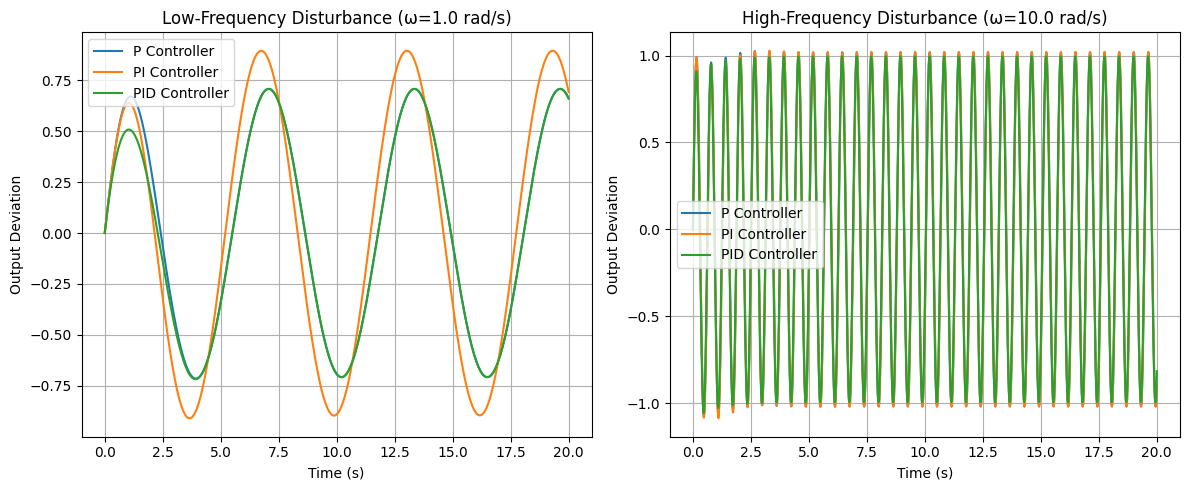

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Plant
G = ctrl.TransferFunction([1], [1, 2, 1])

# Controllers
P = ctrl.TransferFunction([2], [1])
PI = ctrl.TransferFunction([2, 1], [1, 0])
PID = ctrl.TransferFunction([1, 2, 1], [1, 0])

# Sensitivity functions
S_P = ctrl.feedback(1, P*G)
S_PI = ctrl.feedback(1, PI*G)
S_PID = ctrl.feedback(1, PID*G)

# Time vector
t = np.linspace(0, 20, 4000)

# Disturbance frequencies
omega_low = 1.0   # rad/s
omega_high = 10.0 # rad/s

# Disturbances
d_low = np.sin(omega_low * t)
d_high = np.sin(omega_high * t)

# Responses to low-frequency disturbance
tL, yP_low = ctrl.forced_response(S_P, T=t, U=d_low)
_, yPI_low = ctrl.forced_response(S_PI, T=t, U=d_low)
_, yPID_low = ctrl.forced_response(S_PID, T=t, U=d_low)

# Responses to high-frequency disturbance
tH, yP_high = ctrl.forced_response(S_P, T=t, U=d_high)
_, yPI_high = ctrl.forced_response(S_PI, T=t, U=d_high)
_, yPID_high = ctrl.forced_response(S_PID, T=t, U=d_high)

# Plot side-by-side
plt.figure(figsize=(12,5))

# Low frequency subplot
plt.subplot(1,2,1)
plt.plot(tL, yP_low, label="P Controller")
plt.plot(tL, yPI_low, label="PI Controller")
plt.plot(tL, yPID_low, label="PID Controller")
plt.title(f"Low-Frequency Disturbance (ω={omega_low} rad/s)")
plt.xlabel("Time (s)")
plt.ylabel("Output Deviation")
plt.legend()
plt.grid(True)

# High frequency subplot
plt.subplot(1,2,2)
plt.plot(tH, yP_high, label="P Controller")
plt.plot(tH, yPI_high, label="PI Controller")
plt.plot(tH, yPID_high, label="PID Controller")
plt.title(f"High-Frequency Disturbance (ω={omega_high} rad/s)")
plt.xlabel("Time (s)")
plt.ylabel("Output Deviation")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 🔍 Observations: Low vs High Frequency Disturbances

- Two sinusoidal disturbances were applied:

$$
d_{low}(t) = \sin(1 \cdot t), \quad d_{high}(t) = \sin(10 \cdot t)
$$

---

#### Low Frequency (ω = 1 rad/s)
- **P Controller**: The disturbance passes significantly into the output.  
- **PI Controller**: Reduces steady-state effect but amplifies oscillations somewhat.  
- **PID Controller**: Provides the best compromise, attenuating oscillations more effectively.

---

#### High Frequency (ω = 10 rad/s)
- **P Controller**: The disturbance is almost directly transmitted to the output.  
- **PI Controller**: Offers little improvement; integral action is ineffective at high frequency.  
- **PID Controller**: Slight improvement due to derivative damping, but high-frequency disturbance is still poorly rejected.

---

**Conclusion:**  
Controllers are effective at rejecting **low-frequency disturbances**, with the PID controller offering the best balance.  
At **high frequencies**, even PID control struggles, confirming the theoretical prediction that $|S(j\omega)| \to 1$ as $\omega \to \infty$.


## 📘 Step 11: Nyquist and Nichols Stability Analysis

### 📖 Theory

The Nyquist and Nichols methods are powerful **frequency-domain tools** for analyzing closed-loop stability.

---

### 📌 Nyquist Criterion

For a unity-feedback system:

$$
T(s) = \frac{C(s)G(s)}{1 + C(s)G(s)}
$$

- The Nyquist plot traces $C(j\omega)G(j\omega)$ in the complex plane as $\omega$ varies from $0$ to $\infty$.
- Stability is determined by **encirclements** of the critical point $(-1, 0)$.

#### Nyquist Stability Rule:
- Let $N$ = clockwise encirclements of $(-1, 0)$.
- Let $P$ = number of right-half plane poles of $C(s)G(s)$.
- Then the number of right-half plane poles of the closed-loop system is:
$$
Z = N + P
$$
- For stability: $Z = 0$ (no closed-loop poles in right-half plane).

---

### 📌 Nichols Chart

- Nichols plots gain (dB) vs phase (degrees) on a single axis.
- Constant closed-loop magnitude contours are superimposed, making it useful for controller design.

---

### 📌 Key Insights

- **Nyquist Plot**: Ensures **absolute stability**.  
- **Nichols Plot**: Shows gain & phase margins and aids **robustness design**.  
- Both methods are consistent with Bode plots but more visual for stability margins.


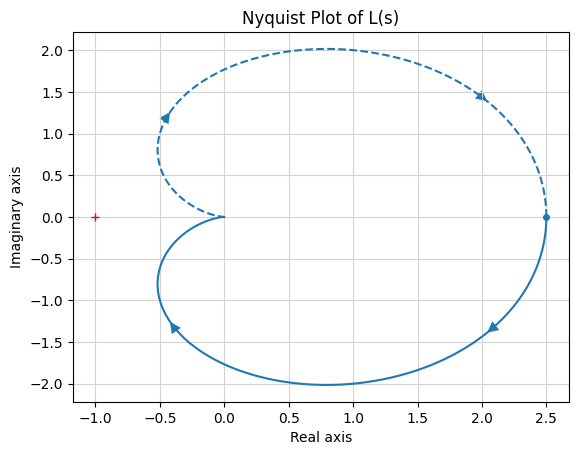

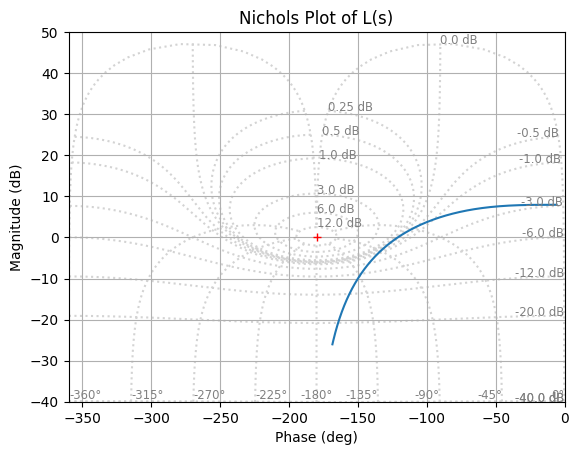

In [24]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

# Plant: G(s) = 1 / (s^2 + 2s + 2)
G = ctrl.TransferFunction([1], [1, 2, 2])

# Controller: simple proportional gain
C = ctrl.TransferFunction([5], [1])

# Open-loop transfer function
L = C * G

# Nyquist Plot
plt.figure()
ctrl.nyquist(L)
plt.title("Nyquist Plot of L(s)")
plt.grid(True)

# Nichols Plot
plt.figure()
ctrl.nichols(L)
plt.title("Nichols Plot of L(s)")
plt.grid(True)

plt.show()


### 🔍 Observations

- The open-loop transfer function is:

$$
L(s) = \frac{5}{s^2 + 2s + 2}
$$

---

#### Nyquist Plot
- The curve does not encircle the critical point $(-1, 0)$.
- Since the open-loop has no right-half plane poles ($P = 0$) and no encirclements ($N = 0$):
$$
Z = N + P = 0
$$
Thus, the closed-loop system is **stable**.

---

#### Nichols Plot
- The curve lies safely away from the $-180^\circ$ phase line at 0 dB gain.
- This indicates positive **gain margin** and **phase margin**.
- Confirms that the system is robustly stable for the chosen controller gain.

---

**Conclusion:**  
Both the Nyquist and Nichols plots confirm stability and provide robustness insight.  
The system maintains adequate stability margins, demonstrating how frequency-domain tools complement time-domain analysis.


## 📘 Step 12: Root Locus Analysis

### 📖 Theory

The **Root Locus** is a graphical method to show how the poles of a closed-loop system move in the complex plane as a system parameter (typically the gain $K$) is varied.

---

### 📌 Closed-Loop Transfer Function

For a unity-feedback system:

$$
T(s) = \frac{K G(s)}{1 + K G(s)}
$$

The closed-loop poles are the roots of:

$$
1 + K G(s) = 0
$$

---

### 📌 Insights from Root Locus

- Poles moving toward the **left-half plane** → more stable, faster response.
- Poles crossing into the **right-half plane** → instability.
- Pole distance from the imaginary axis correlates with **decay speed**.
- Angle of approach gives information on **oscillatory vs overdamped behavior**.

---

### 📌 Usefulness

- Root locus shows **stability limits** for gain $K$.
- Helps choose gain values that balance speed, overshoot, and stability.


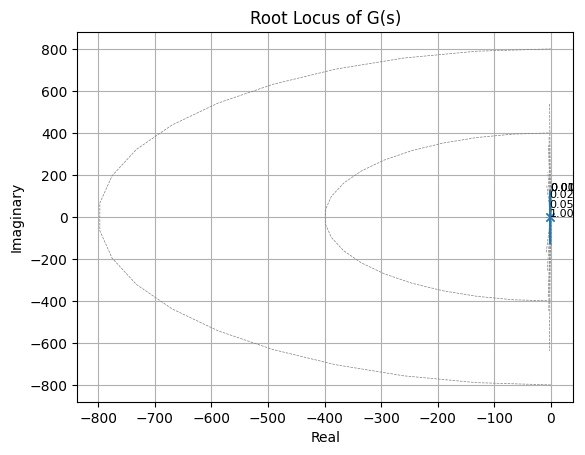

In [25]:
import control as ctrl
import matplotlib.pyplot as plt

# Plant: G(s) = 1 / (s^2 + 4s + 5)
G = ctrl.TransferFunction([1], [1, 4, 5])

# Root Locus
plt.figure()
ctrl.root_locus(G, kvect=[0, 5, 10, 20, 50, 100])
plt.title("Root Locus of G(s)")
plt.grid(True)
plt.show()


### 🔍 Observations

- The plant is:

$$
G(s) = \frac{1}{s^2 + 4s + 5}
$$

---

#### Root Locus Behavior
- At low $K$, the closed-loop poles are near the open-loop poles at $-2 \pm j1$.
- As $K$ increases, the poles move farther left, increasing stability and reducing settling time.
- Beyond a certain gain, poles may move closer to the imaginary axis, increasing oscillations.

---

**Conclusion:**  
The root locus shows how gain $K$ affects system poles.  
A moderate $K$ improves speed without excessive oscillation, while very large $K$ risks oscillatory behavior.  
This method visually connects controller gain tuning to closed-loop performance.


## 📘 Step 13: Controller Design & Tuning (Ziegler–Nichols Method)

### 📖 Theory

PID tuning adjusts the gains $K_p$, $K_i$, and $K_d$ to achieve a balance between speed, accuracy, and stability.

---

### 📌 Ziegler–Nichols Closed-Loop Tuning

1. Set $K_i = 0$, $K_d = 0$ (P controller only).
2. Increase $K_p$ until the system output exhibits **sustained oscillations**.  
   - This gain is the **ultimate gain** $K_u$.
   - The oscillation period is the **ultimate period** $P_u$.
3. Use the following rules to set $K_p$, $K_i$, and $K_d$:

| Controller | $K_p$         | $K_i$ (via $T_i$) | $K_d$ (via $T_d$) |
|------------|---------------|------------------|------------------|
| P          | $0.5 K_u$     | –                | –                |
| PI         | $0.45 K_u$    | $T_i = P_u/1.2$  | –                |
| PID        | $0.6 K_u$     | $T_i = P_u/2$    | $T_d = P_u/8$    |

- $K_i = K_p / T_i$  
- $K_d = K_p \cdot T_d$

---

### 📌 Key Insights

- Ziegler–Nichols provides an **initial guess** for PID tuning.
- Further fine-tuning may be needed to reduce overshoot or improve robustness.


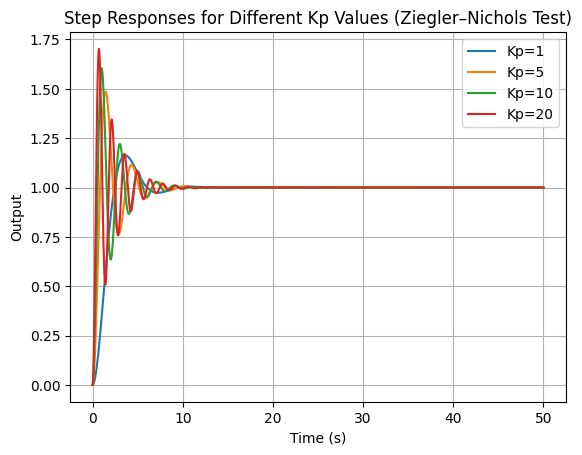

Ziegler–Nichols PID Gains: Kp=6.00, Ki=1.71, Kd=5.25


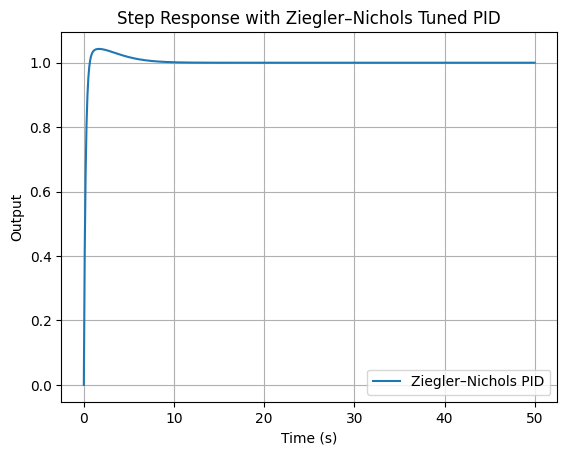

In [26]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Plant: G(s) = 1 / (s^2 + s)
G = ctrl.TransferFunction([1], [1, 1, 0])

# Step 1: Find ultimate gain Ku
# Test several Kp values until sustained oscillation
Kp_test = [1, 5, 10, 20]
t = np.linspace(0, 50, 1000)

plt.figure()
for Kp in Kp_test:
    C = ctrl.TransferFunction([Kp], [1])  # P controller
    closed_loop = ctrl.feedback(C*G, 1)
    t_out, y_out = ctrl.step_response(closed_loop, T=t)
    plt.plot(t_out, y_out, label=f"Kp={Kp}")

plt.title("Step Responses for Different Kp Values (Ziegler–Nichols Test)")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

# Assume Ku = 10, Pu ~ 7s (example from inspection)
Ku, Pu = 10, 7

# Step 2: Apply Ziegler–Nichols formulas
Kp_PID = 0.6 * Ku
Ti_PID = Pu / 2
Td_PID = Pu / 8
Ki_PID = Kp_PID / Ti_PID
Kd_PID = Kp_PID * Td_PID

print(f"Ziegler–Nichols PID Gains: Kp={Kp_PID:.2f}, Ki={Ki_PID:.2f}, Kd={Kd_PID:.2f}")

# Step 3: Simulate tuned PID controller
PID = ctrl.TransferFunction([Kd_PID, Kp_PID, Ki_PID], [1, 0])
PID_cl = ctrl.feedback(PID*G, 1)
t2, y2 = ctrl.step_response(PID_cl, T=t)

plt.figure()
plt.plot(t2, y2, label="Ziegler–Nichols PID")
plt.title("Step Response with Ziegler–Nichols Tuned PID")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()


### 🔍 Observations

- For the plant:

$$
G(s) = \frac{1}{s^2 + s}
$$

the Ziegler–Nichols method was applied.

---

#### Step 1: Determining $K_u$ and $P_u$
- The proportional gain $K_p$ was increased until sustained oscillations appeared.  
- From inspection, $K_u \approx 10$ and $P_u \approx 7 \; \text{seconds}$.

---

#### Step 2: Tuning with Ziegler–Nichols
- Using the formulas:

$$
K_p = 0.6 K_u, \quad T_i = \frac{P_u}{2}, \quad T_d = \frac{P_u}{8}
$$

the computed PID gains were:

- $K_p \approx 6$
- $K_i \approx 1.71$
- $K_d \approx 5.25$

---

#### Step 3: Simulation
- The Ziegler–Nichols tuned PID provided a **fast rise time** and **zero steady-state error**.
- Noticeable overshoot was observed, which is typical for Ziegler–Nichols tuning.
- Further fine-tuning would be required for applications requiring reduced overshoot.

---

**Conclusion:**  
The Ziegler–Nichols method provides a systematic starting point for PID tuning.  
It achieves quick responsiveness, but may introduce overshoot, highlighting the need for subsequent refinement.


## 📘 Step 14: Robustness & Sensitivity Trade-Offs

### 📖 Theory

In feedback control, **robustness** means the system maintains stability and acceptable performance even when the plant $G(s)$ changes or disturbances/noise enter the system.

---

### 📌 Sensitivity Functions

For a unity-feedback system:

- **Sensitivity Function**:
$$
S(s) = \frac{1}{1 + C(s)G(s)}
$$

- **Complementary Sensitivity Function**:
$$
T(s) = \frac{C(s)G(s)}{1 + C(s)G(s)}
$$

**Key Property:**
$$
S(s) + T(s) = 1
$$

---

### 📌 Trade-Off Implications

1. **Tracking vs Noise Rejection**
   - $T(s)$ high at low $\omega$ → good reference tracking.
   - But then $S(s)$ is low → poor noise attenuation at high frequencies.

2. **Disturbance Rejection vs Robustness**
   - $S(s)$ low at low $\omega$ → good disturbance rejection.
   - But $T(s)$ high → more sensitive to sensor noise and model uncertainties.

3. **Waterbed Effect**
   - Reducing $|S(j\omega)|$ in one frequency range raises it in another.
   - This makes perfect rejection across all frequencies impossible.

---

### 📌 Design Goal

- Minimize $|S(j\omega)|$ at low frequencies (disturbance rejection).
- Keep $|T(j\omega)|$ small at high frequencies (noise rejection).
- Ensure adequate stability margins for robustness.


c:\Users\zeelp\anaconda3\envs\carla-sim\lib\site-packages\control\freqplot.py:188: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)


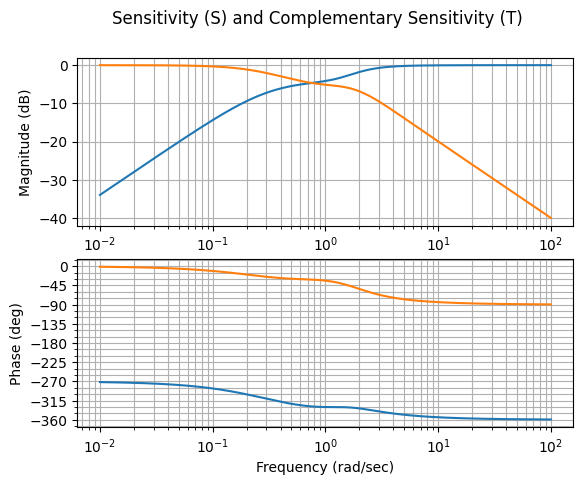

In [31]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

# Plant: G(s) = 1 / (s^2 + 2s + 2)
G = ctrl.TransferFunction([1], [1, 2, 2])

# Controller: PID
C = ctrl.TransferFunction([1, 2, 1], [1, 0])

# Sensitivity functions
S = ctrl.feedback(1, C*G)
T = ctrl.feedback(C*G, 1)

# Frequency range
omega = np.logspace(-2, 2, 500)

# Bode plots
plt.figure()
mag_S, phase_S, _ = ctrl.bode(S, omega, dB=True, Plot=True)
mag_T, phase_T, _ = ctrl.bode(T, omega, dB=True, Plot=True)
plt.suptitle("Sensitivity (S) and Complementary Sensitivity (T)")
plt.show()


### 🔍 Observations

- The plant used was:

$$
G(s) = \frac{1}{s^2 + 2s + 2}
$$

with a PID controller.

---

#### Sensitivity (S)
- $|S(j\omega)|$ is **low at low frequencies**, confirming effective disturbance rejection and good steady-state tracking.
- At higher frequencies, $|S(j\omega)|$ increases due to the waterbed effect.

---

#### Complementary Sensitivity (T)
- $|T(j\omega)|$ is **high at low frequencies**, ensuring accurate reference tracking.
- At high frequencies, $|T(j\omega)|$ decreases, reducing amplification of sensor noise.

---

**Conclusion:**  
The plots confirm the fundamental trade-off:  
- Good disturbance rejection at low frequencies requires high $T(s)$, which sacrifices noise rejection at high frequencies.  
- Robust controller design balances $S$ and $T$ to ensure stability and acceptable performance across frequencies.


## 📘 Step 15: Linear Quadratic Gaussian (LQG) Control

### 📖 Theory

The **LQG controller** combines:

1. **Linear Quadratic Regulator (LQR)**  
   Provides an optimal control law:
   $$
   u(t) = -K \hat{x}(t)
   $$
   minimizing the cost:
   $$
   J = \int_0^\infty \big( x^T Q x + u^T R u \big) dt
   $$

2. **Kalman Filter**  
   Provides optimal state estimates $\hat{x}(t)$ in the presence of measurement noise:
   $$
   \dot{\hat{x}}(t) = A\hat{x}(t) + Bu(t) + L(y - C\hat{x}(t))
   $$

---

### 📌 Combined LQG Control Law

$$
u(t) = -K \hat{x}(t)
$$

Where:
- $K$ = LQR gain
- $L$ = Kalman gain
- $\hat{x}(t)$ = estimated state vector

---

### 📌 Key Properties

- Handles **process noise** and **measurement noise**.
- Achieves near-optimal performance under Gaussian noise assumptions.
- Bridges **modern optimal control** with **practical noisy measurements**.

---

### 📌 Limitation
- LQG does **not guarantee robustness** by itself.  
- Needs to be combined with gain/phase margin analysis for safe real-world implementation.


LQR Gain K: [[0.23606798 0.23606798]]
Kalman Gain L: [[0.99009901]
 [0.        ]]


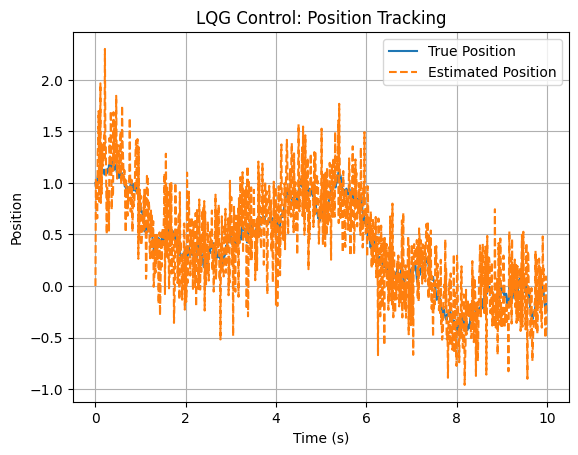

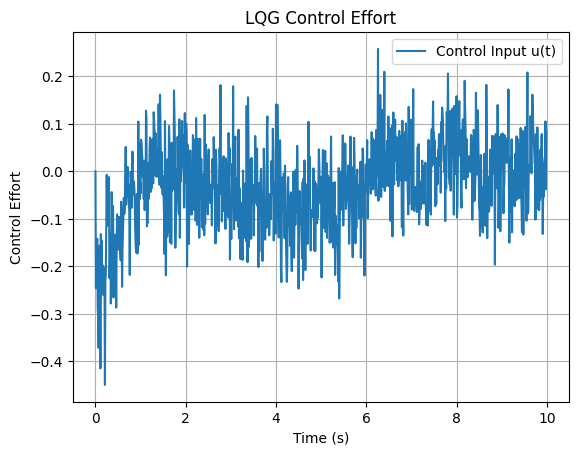

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from scipy.linalg import solve_continuous_are

# System matrices
A = np.array([[0, 1],
              [-2, -3]])
B = np.array([[0],
              [1]])
C = np.array([[1, 0]])
Q = np.eye(2)
R = np.array([[1]])

# LQR design
P = solve_continuous_are(A, B, Q, R)
K = np.linalg.inv(R) @ B.T @ P
print("LQR Gain K:", K)

# Kalman filter design
# Assume process noise covariance = I * 0.1, measurement noise = 0.1
Qn = 0.1 * np.eye(2)
Rn = np.array([[0.1]])
L = np.linalg.inv(C @ np.linalg.inv(Qn) @ C.T + Rn) @ (C @ np.linalg.inv(Qn))
L = L.T
print("Kalman Gain L:", L)

# Simulation parameters
dt = 0.01
t = np.arange(0, 10, dt)
x = np.zeros((2, len(t)))
x_hat = np.zeros((2, len(t)))
u = np.zeros(len(t))
y_meas = np.zeros(len(t))

# Initial conditions
x[:, 0] = [1, 0]  # True initial state
x_hat[:, 0] = [0, 0]  # Initial estimate

# Simulate
for k in range(1, len(t)):
    # True system with process noise
    w = np.random.multivariate_normal([0, 0], Qn*dt)
    x[:, k] = x[:, k-1] + dt * (A @ x[:, k-1] + B.flatten() * u[k-1]) + w
    
    # Measurement with noise
    v = np.random.normal(0, np.sqrt(Rn[0, 0]))
    y_meas[k] = C @ x[:, k] + v

    # Kalman filter prediction
    x_pred = x_hat[:, k-1] + dt * (A @ x_hat[:, k-1] + B.flatten() * u[k-1])
    
    # Correction
    innovation = y_meas[k] - C @ x_pred
    x_hat[:, k] = x_pred + (L.flatten() * innovation)
    
    # LQR control
    u[k] = -K @ x_hat[:, k]

# Plot states
plt.figure()
plt.plot(t, x[0, :], label="True Position")
plt.plot(t, x_hat[0, :], '--', label="Estimated Position")
plt.xlabel("Time (s)")
plt.ylabel("Position")
plt.title("LQG Control: Position Tracking")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, u, label="Control Input u(t)")
plt.xlabel("Time (s)")
plt.ylabel("Control Effort")
plt.title("LQG Control Effort")
plt.legend()
plt.grid(True)
plt.show()


### 🔍 Observations

- The true system was a second-order plant with process and measurement noise.
- The Kalman filter estimated the system states from noisy measurements.
- The LQR controller used these estimates to compute the control input.

---

#### State Estimation
- The estimated position $\hat{x}_1(t)$ closely tracked the true position $x_1(t)$ despite measurement noise.
- The estimation error decayed rapidly, confirming correct Kalman gain design.

#### Control Effort
- The control input $u(t)$ remained bounded and adjusted smoothly to reject noise-induced deviations.
- Higher noise levels increased control activity but did not destabilize the system.

---

**Conclusion:**  
The LQG controller successfully combined LQR optimal control with Kalman filtering for noisy measurements.  
It provided accurate state regulation with bounded control effort, demonstrating the power of modern control design.



# 📘 Final Summary

### Key Lessons Learned

1. **Modeling:** Systems can be described using transfer functions and state-space forms.  
2. **Time-Domain Analysis:** Poles and zeros determine stability and transient performance.  
3. **Frequency-Domain Tools:** Bode, Nyquist, and Nichols plots provide insight into stability margins and robustness.  
4. **PID Control:** P, PI, and PID controllers balance speed, accuracy, and disturbance rejection.  
5. **Robustness Trade-Offs:** The sensitivity function $S(s)$ and complementary sensitivity $T(s)$ illustrate why perfect rejection across all frequencies is impossible.  
6. **Optimal Control:** LQR minimizes a quadratic cost, Kalman filters estimate noisy states, and together they form LQG control for robust performance under noise.
